In [1]:
import meep as mp 
import numpy as np
import matplotlib.pyplot as plt
from hexalattice.hexalattice import *

plt.rcParams.update({'font.size': 16})
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

In [159]:
def PC_geometry(N):
        
        geometry = [mp.Block(center=mp.Vector3(0,0,0), 
                    size=mp.Vector3(length-2*dpml,length-2*dpml,t), 
                    material=mp.Medium(index = 2))]              # Block of SiN extending up to PML region
        
        # A hexagonal prism defined by six vertices centered on the origin
        # of material crystalline silicon (from the materials library)

        multiplier = (1-t)*0.5

        vertices = [mp.Vector3(0,multiplier*2/np.sqrt(3)),
                    mp.Vector3(multiplier*1,multiplier*1/np.sqrt(3)),
                    mp.Vector3(multiplier*1,-multiplier*1/np.sqrt(3)),
                    mp.Vector3(0,multiplier*-2/np.sqrt(3)),
                    mp.Vector3(-multiplier*1,-multiplier*1/np.sqrt(3)),
                    mp.Vector3(-multiplier*1,multiplier*1/np.sqrt(3))]

        hex_centers, _ = create_hex_grid(nx=N, ny=N, crop_circ=N//2)

        for center in hex_centers: 
            center_final = mp.Vector3(center[0], center[1])
            geometry.append(mp.Prism(vertices,
                                     height=t,
                                     center=center_final,
                                     material=mp.Medium(index = 1),
                                     sidewall_angle = np.radians(7.9)) ) #add the hexagons in the lattice
        
        return geometry

In [160]:
atom_pos = mp.Vector3(0.0,0.0,0.0)
component = mp.Ez

a = 405e-9 # nm                                              # lattice constant
t = 180e-9 / a                                               # thickness of slab

c = 3e8

fcen = 350e12 * a / c                                        # normalized frequency (MEEP units) 
df = 50e12 * 2 * a / c                                       # spectral width 
nfreq = 500                                                  # number of frequency points

resolution = 8                                              # 4 pixels per unit a 

N = 27

length = 30                                                  # Length of X & Y dimensions
lengthz = 5                                                  # Length of Z dimension   

cell = mp.Vector3(length, length, lengthz)                   # Simulation volume

dpml = 1                                                     # PML layer thickness
#pml_layers = [mp.PML(dpml)]                                  # PML layer
    
src = [mp.Source(src=mp.GaussianSource(fcen, fwidth=0.5),
                     center=atom_pos,
                     component=component, 
                     amplitude=1.0),
          ]                                                          # broadband Gaussian source

geometry = PC_geometry(N) 



sim = mp.Simulation(cell_size=cell,
                    #boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=src,
                    resolution=resolution,
                    force_complex_fields=True,
                        )                                            # simulation set up

sim.plot2D(output_plane=mp.Volume(center=mp.Vector3(0,0,0),size=mp.Vector3(30,0,5)))

TypeError: __init__() got an unexpected keyword argument 'sidewall_angle'

# THIS SHOULD WORK ON LAQS

In [ ]:
sim.plot2D(output_plane=mp.Volume(center=mp.Vector3(0,0,0),size=mp.Vector3(30,30,0)))

<AxesSubplot:xlabel='Y', ylabel='Z'>

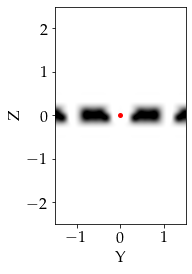

In [151]:
sim.plot2D(output_plane=mp.Volume(center=mp.Vector3(0,0,0),size=mp.Vector3(0,30,5)))

In [2]:
def imag_green_broadband (position, slope == False):
    
    atom_pos = position
    
    #-----------------------------------------------------------------------------------------------------#
    # Simulation parameters
    #-----------------------------------------------------------------------------------------------------#
    
    print('-----------------------------------------------------------------------------------------------')
    print('SETTING PARAMETERS ...')
    print('-----------------------------------------------------------------------------------------------')
    
    a = 405e-9 # nm                                              # lattice constant
    t = 180e-9 / a                                               # thickness of slab

    c = 3e8

    fcen = 350e12 * a / c                                        # normalized frequency (MEEP units) 
    df = 50e12 * 2 * a / c                                       # spectral width 
    nfreq = 500                                                  # number of frequency points
    
    #-----------------------------------------------------------------------------------------------------#
    # Simulation space
    #-----------------------------------------------------------------------------------------------------#
    
    resolution = 10                                              # 10 pixels per unit a 

    length = 30                                                  # Length of X & Y dimensions
    lengthz = 5                                                  # Length of Z dimension   

    cell = mp.Vector3(length, length, lengthz)                   # Simulation volume

    dpml = 1                                                     # PML layer thickness
    pml_layers = [mp.PML(dpml)]                                  # PML layer
    
    N = 27                                                       # Number of holes
    
    def free_space_geometry():
        
        geometry = [mp.Block(center=mp.Vector3(0,0,0), 
                    size=mp.Vector3(length-2*dpml,length-2*dpml,t), 
                    material=mp.Medium(index = 1))]
        
        return geometry
    
    def PC_geometry(N):
        
        geometry = [mp.Block(center=mp.Vector3(0,0,0), 
                    size=mp.Vector3(length-2*dpml,length-2*dpml,t), 
                    material=mp.Medium(index = 2))]              # Block of SiN extending up to PML region
        
        # A hexagonal prism defined by six vertices centered on the origin
        # of material crystalline silicon (from the materials library)

        multiplier = (1-t)*0.5

        vertices = [mp.Vector3(0,multiplier*2/np.sqrt(3)),
                    mp.Vector3(multiplier*1,multiplier*1/np.sqrt(3)),
                    mp.Vector3(multiplier*1,-multiplier*1/np.sqrt(3)),
                    mp.Vector3(0,multiplier*-2/np.sqrt(3)),
                    mp.Vector3(-multiplier*1,-multiplier*1/np.sqrt(3)),
                    mp.Vector3(-multiplier*1,multiplier*1/np.sqrt(3))]

        hex_centers, _ = create_hex_grid(nx=N, ny=N, crop_circ=N//2)

        for center in hex_centers: 
            center_final = mp.Vector3(center[0], center[1])
            geometry.append(mp.Prism(vertices,
                                     height=t,
                                     center=center_final,
                                     material=mp.Medium(index = 1))) #add the hexagons in the lattice
        
        return geometry
    
    #-----------------------------------------------------------------------------------------------------#
    # RUN SIMULATIONS
    #-----------------------------------------------------------------------------------------------------#
    
    def run(component):
        
        src = [mp.Source(src=mp.GaussianSource(fcen, fwidth=0.5),
                     center=atom_pos,
                     component=component, 
                     amplitude=1.0),
          ]                                                          # broadband Gaussian source
    
        # FREE SPACE CALCULATION
    
        geometry = free_space_geometry()                             # Free space geometry
    
        sim = mp.Simulation(cell_size=cell,
                        boundary_layers=pml_layers,
                        geometry=geometry,
                        sources=src,
                        resolution=resolution,
                        force_complex_fields=True,
                        )                                            # simulation set up
    
        pt = mp.Vector3(0,0)
        sim.run(mp.dft_ldos( fcen, df, nfreq),until_after_sources=mp.stop_when_fields_decayed(25,component,pt,1e-8))
        gi0=sim.ldos_data
        
    
        # PHOTONIC CRYSTAL CALCULATION
        
        geometry = PC_geometry(N)                                    # PC geometry
    
        sim = mp.Simulation(cell_size=cell,
                        boundary_layers=pml_layers,
                        geometry=geometry,
                        sources=src,
                        resolution=resolution,
                        force_complex_fields=True,
                        )                                            # simulation set up
        
        pt = mp.Vector3(0,0)
        sim.run(mp.dft_ldos(fcen, df, nfreq),until=750)
        gi=sim.ldos_data    
        
        
        return gi, gi0
    
    #-----------------------------------------------------------------------------------------------------#
    # Calculation for X direction
    #-----------------------------------------------------------------------------------------------------#
    
    print('-----------------------------------------------------------------------------------------------')
    print('CALCULATION FOR X DIRECTION ...')
    print('-----------------------------------------------------------------------------------------------')
    
    gix, gix0 = run(mp.Ex)
    
    #-----------------------------------------------------------------------------------------------------#
    # Calculation for Y direction
    #-----------------------------------------------------------------------------------------------------#
    
    print('-----------------------------------------------------------------------------------------------')
    print('CALCULATION FOR Y DIRECTION ...')
    print('-----------------------------------------------------------------------------------------------')
    
    giy, giy0 = run(mp.Ey)
    
    #-----------------------------------------------------------------------------------------------------#
    # Calculation for Z direction
    #-----------------------------------------------------------------------------------------------------#
    
    print('-----------------------------------------------------------------------------------------------')
    print('CALCULATION FOR Z DIRECTION ...')
    print('-----------------------------------------------------------------------------------------------')
    
    giz, giz0 = run(mp.Ez)
    
    return np.real(gix)/np.real(gix0), np.real(giy)/np.real(giy0), np.real(giz)/np.real(giz0)

In [3]:
position = mp.Vector3(0.0,0.0,0.0)
green_tensor = imag_green_broadband (position)

-----------------------------------------------------------------------------------------------
SETTING PARAMETERS ...
-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------
CALCULATION FOR X DIRECTION ...
-----------------------------------------------------------------------------------------------
-----------
Initializing structure...
time for choose_chunkdivision = 0.000558138 s
Working in 3D dimensions.
Computational cell is 30 x 30 x 5 with resolution 10
     block, center = (0,0,0)
          size (28,28,0.444444)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 9.95862 s
-----------
Meep: using complex fields.
on time step 1 (time=0.05), 11.779 s/step
on time step 14 (time=0.7), 0.333179 s/step
on time step 27 (time=1.35), 0.332899 s/step
on time step 40 (time=2), 0.333407 

In [4]:
se_x, se_y, se_z = green_tensor

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


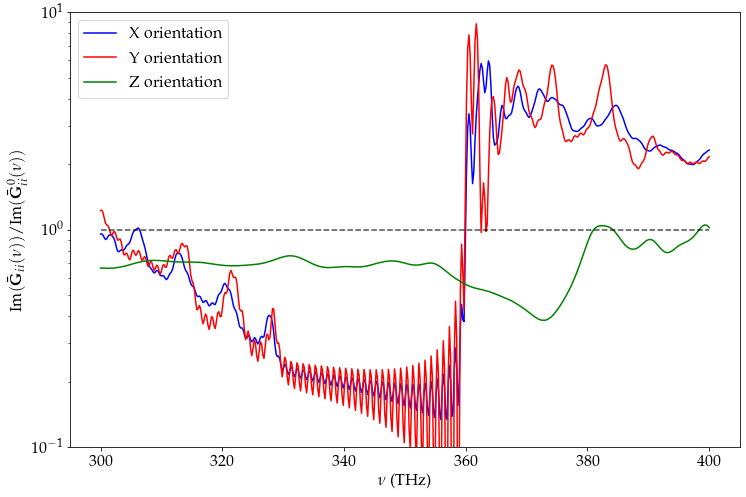

In [5]:
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(np.linspace(300,400,500),se_x, label='X orientation', color='blue')
ax.plot(np.linspace(300,400,500),se_y, label='Y orientation', color='red')
ax.plot(np.linspace(300,400,500),se_z, label='Z orientation', color='green')


ax.plot(np.linspace(300,400,500),np.ones(500), linestyle='dashed', color='black', alpha=0.7)
ax.set_yscale('log')
ax.set_ylim([0.1,10])
ax.set_ylabel('Im$(\mathbf{\\bar{G}}_{ii}(\\nu))$/Im$(\mathbf{\\bar{G}}^{0}_{ii}(\\nu))$')
ax.set_xlabel('$\\nu$ (THz)')
ax.legend()

It works!